## SMOTE를 활용한 불균형 데이터 문제 해소
- 작물 데이터를 활용하여 과제 수행하였습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -uq '/content/drive/MyDrive/data/딥러닝/235842_작물 병해 분류 AI 경진대회_data.zip' -d './' # 현재폴더에 압축해제

In [3]:
import numpy as np
import pandas as pd
from PIL import Image 
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')

In [4]:
df.head()

,uid,img_path,disease,disease_code
0,10000,train_imgs/10000.jpg,시설포도노균병,1
1,10001,train_imgs/10001.jpg,시설포도노균병,1
2,10002,train_imgs/10002.jpg,시설포도노균병반응,2
3,10003,train_imgs/10003.jpg,축과병,4
4,10004,train_imgs/10004.jpg,시설포도노균병,1


In [5]:
# 데이터 자체의 불균형 여부
# train test 나눈 뒤에도 불균형여부 
# SMOTE를 활용 불균형 해소 여부
# 각각의 train test 를 통하여 모델 제작

## 데이터셋 자체 불균형 여부

In [6]:
df.disease_code.value_counts() 

# 0 - 6 까지 질병종류가 줄어들고 있다

0    106
1     46
2     30
3     29
4     17
5     12
6     10
Name: disease_code, dtype: int64

## xy 로 나눔


In [7]:
x= []
y =[]
for i, j in zip(df.img_path, df.disease_code):
  image = Image.open(i)
  image = image.resize((255,255)) #괄호 두개 잊지말자
  image = img_to_array(image) / 255
  x.append(image)
  y.append(j)

In [ ]:
np.shape(x)

(250, 255, 255, 3)

## 불균형 분할

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                  test_size = 0.3, random_state=77)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([77, 36, 22, 20, 11,  5,  4]))

In [10]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([29, 10,  8,  9,  6,  7,  6]))

In [11]:
np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test)

((175, 255, 255, 3), (175,), (75, 255, 255, 3), (75,))

In [12]:
np.shape(np.array(x_test))

(75, 255, 255, 3)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (255, 255, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (255, 255, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

model.add(Dense(7, activation = 'softmax'))

In [14]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', # 원핫 안해도 마지막 dense 2개로 할수 있다 
             metrics = ['acc'])

In [15]:
history = model.fit(np.array(x_train), np.array(y_train),
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (np.array(x_test), np.array(y_test)))

Epoch 1/20
6/6 [==============================] - 20s 351ms/step - loss: 1.7248 - acc: 0.3657 - val_loss: 1.8197 - val_acc: 0.3867
Epoch 2/20
6/6 [==============================] - 1s 94ms/step - loss: 1.5190 - acc: 0.4400 - val_loss: 1.7787 - val_acc: 0.3867
Epoch 3/20
6/6 [==============================] - 1s 92ms/step - loss: 1.4674 - acc: 0.4400 - val_loss: 1.8044 - val_acc: 0.3867
Epoch 4/20
6/6 [==============================] - 1s 93ms/step - loss: 1.3842 - acc: 0.4686 - val_loss: 1.6630 - val_acc: 0.4133
Epoch 5/20
6/6 [==============================] - 1s 93ms/step - loss: 1.2594 - acc: 0.5200 - val_loss: 1.5519 - val_acc: 0.4133
Epoch 6/20
6/6 [==============================] - 1s 93ms/step - loss: 1.1023 - acc: 0.5143 - val_loss: 1.4441 - val_acc: 0.4400
Epoch 7/20
6/6 [==============================] - 1s 90ms/step - loss: 0.8690 - acc: 0.7200 - val_loss: 1.2948 - val_acc: 0.5600
Epoch 8/20
6/6 [==============================] - 1s 93ms/step - loss: 0.6859 - acc: 0.7543 - v

## 균형 분할

In [16]:
from imblearn.over_sampling import BorderlineSMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
x_train = np.array(x_train) # smote 에 넣기위해 변환
x_test = np.array(x_test)

In [35]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([71, 34, 22, 20, 11, 10,  7]))

In [36]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([35, 12,  8,  9,  6,  2,  3]))

In [37]:
len(x_train_smoote), len(y_train)

(175, 175)

In [38]:
x_train_smoote.shape

(175, 195075)

In [39]:
x_train_smoote = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3])).astype(np.float32)
smote = BorderlineSMOTE()
x_train_smoote, y_train_sommte = smote.fit_resample(x_train_smoote, y_train)

x_train_smoote = x_train_smoote.reshape(-1,255,255,3) #다시 원상태로

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [40]:
np.shape(x_train), np.shape(y_train)

((175, 255, 255, 3), (175,))

In [41]:
np.shape(x_train_smoote), np.shape(y_train_sommte) #두개의 길이차이가 난다

((497, 255, 255, 3), (497,))

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (255, 255, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (255, 255, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

model.add(Dense(7, activation = 'softmax'))
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', # 원핫 안해도 마지막 dense 2개로 할수 있다 
             metrics = ['acc'])

In [43]:
history_smote = model.fit(np.array(x_train_smoote), np.array(y_train_sommte),
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (np.array(x_test), np.array(y_test)))

Epoch 1/20
16/16 [==============================] - 3s 156ms/step - loss: 1.7548 - acc: 0.4024 - val_loss: 1.4582 - val_acc: 0.5467
Epoch 2/20
16/16 [==============================] - 1s 88ms/step - loss: 0.8285 - acc: 0.7344 - val_loss: 1.7301 - val_acc: 0.3600
Epoch 3/20
16/16 [==============================] - 1s 87ms/step - loss: 0.4152 - acc: 0.8712 - val_loss: 1.0934 - val_acc: 0.6400
Epoch 4/20
16/16 [==============================] - 1s 87ms/step - loss: 0.2395 - acc: 0.9296 - val_loss: 1.1801 - val_acc: 0.6133
Epoch 5/20
16/16 [==============================] - 1s 89ms/step - loss: 0.1120 - acc: 0.9738 - val_loss: 0.7720 - val_acc: 0.7200
Epoch 6/20
16/16 [==============================] - 1s 87ms/step - loss: 0.0412 - acc: 0.9920 - val_loss: 0.7962 - val_acc: 0.7867
Epoch 7/20
16/16 [==============================] - 1s 88ms/step - loss: 0.0255 - acc: 0.9960 - val_loss: 0.7160 - val_acc: 0.8133
Epoch 8/20
16/16 [==============================] - 1s 87ms/step - loss: 0.0727 - 

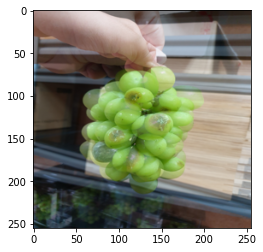

In [47]:
plt.imshow(x_train_smoote[412]) #이런식으로 복사한다

## 불균형데이터셋과 SOMTE 훈련결과 비교

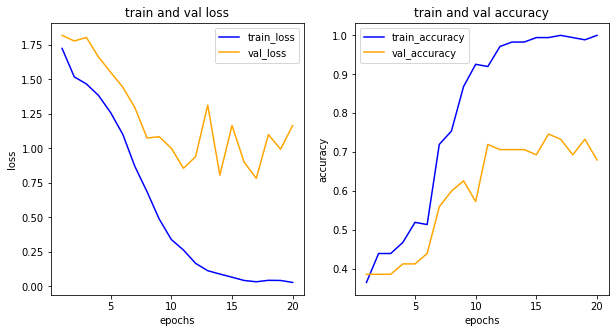

In [49]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

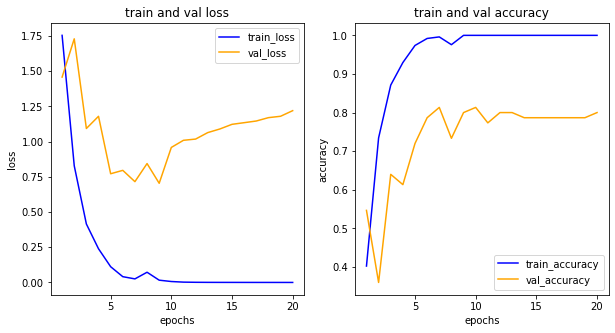

In [50]:
import matplotlib.pyplot as plt

his_dict = history_smote.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()